<a href="https://colab.research.google.com/github/kostkalab/mol-evol_notebooks/blob/main/lecture_mol_evol_03_22_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mystery alignment

In this lecture we'll analyze an alignment we don't know where it came from and use the tools we have learned about previously to infer a generating model.

Specifically, we'd like to know: Assuming one of the substitution models we talked about:

- What was the tree topology that generated this alignment?
- What was the reate matrix, what were the branch lengths (i.e., expected number of substitutions on each branch)?

First, we will install `rphast` and download the alignment.

In [1]:
devtools::install_github("CshlSiepelLab/RPHAST")

── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpzngHik/remotes1251e4a07cc/CshlSiepelLab-RPHAST-2b68f4c/DESCRIPTION’ ... OK
* preparing ‘rphast’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* running ‘cleanup’
* checking vignette meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘rphast_1.6.11.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
#- download alignment
#--------------------
url       <- 'https://github.com/kostkalab/mol-evol_notebooks/raw/main/mystery_msa.rds'
tfle_name <- paste0(tempfile(),'.rds')
download.file(url, tfle_name)
msa       <- readRDS(tfle_name)
# msa
file.remove(tfle_name) #- cleanup

[1] TRUE

# Group discussion

Discuss together on what are the next steps:

- What are all the parameters of the model that generated this alignment?
- How can we find out about them?

Take ~5 or so minutes and come up with a verbal plan.

We will then work together to implement it here on colab.

In [3]:
msa

$seqs
[1] "CTGCGTCAACCTGTTGCACTGCGGGGGGGGTCCCGCCTACCTCTCACTGGCCCTCATTCCGTCTTGCGTAAGGCCGTTCCAGCTCCCCTCCTCCGATCTTTTTGGACTTGAAATGTTAGGGTCCCCCCACAGGCTCATCGTTTTGGTATTAGCAACGCTGTTCCCCCTCTCTCACCGCTACCTCCACACCCATAATCGAACCGTGATGGCTGGTGCATAGATGGACGCCATCAGCTATCATCCCTTCCCACCACCACAGGGCGTCCTAGCGTGGGTCATCTTTGGATAAACGCATGGCCAGGAGACCCACACTAGGACCAGGGCCCCGTGCAATCGGAGAGCCGGGTCATTACCTGATCCGCCTGTAACAATGCACCCCCTCAATCCCACTCCTGCAAATCCATACTGGGGGAGCGTATCCACTAGCAGAAGCGCAGGCTACGCGTGAGGACTTAGGGTCTTTGCATGTTAGACAGGCTACAGCCAGGACCGCTACCGCGGCTAGCAGAAGACTGCCTACCGGAGTTGTCGTTTGGGGTAAAGACTAGCGCCTGTTTATTAACAGTGCTAGCGTCCCGGTCCATTGGAGTGTTATACTCGACATCACCGTTAGTTTCCCGCGCACCAAGTGATATCAAGGAGCAACCTCATCTTACGGTGACCATGCTAGCCTATGCAGTGCCTGACGATCCAGGTAACCTCGGCTAGGCGCCTCTCCCTTCTCATAATGTTGGCCCGTGAGTTCACCGACAGCGGTACATCCGCACCAGCATGGTATTACCAGGTGGGGATTACTTATCCCAAGGCCGTTCGCGCCCATAAAAGCGCCGCTCTTCCCCAACTTGCTTGCCCATCAAGCTGCGCCTGACTCGAAATCTTTTGCCGGCACCCTACTGTGGAGTCATCCACACTGGAAACCATCCACGTCTACACCCTCGTACGGTAGATGCTTCAGCAGGGAGGCAATGATGTCTCAAGTCCGTGAATCG

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ape’, ‘fastmatch’, ‘igraph’, ‘quadprog’, ‘Rcpp’


Loading required package: ape



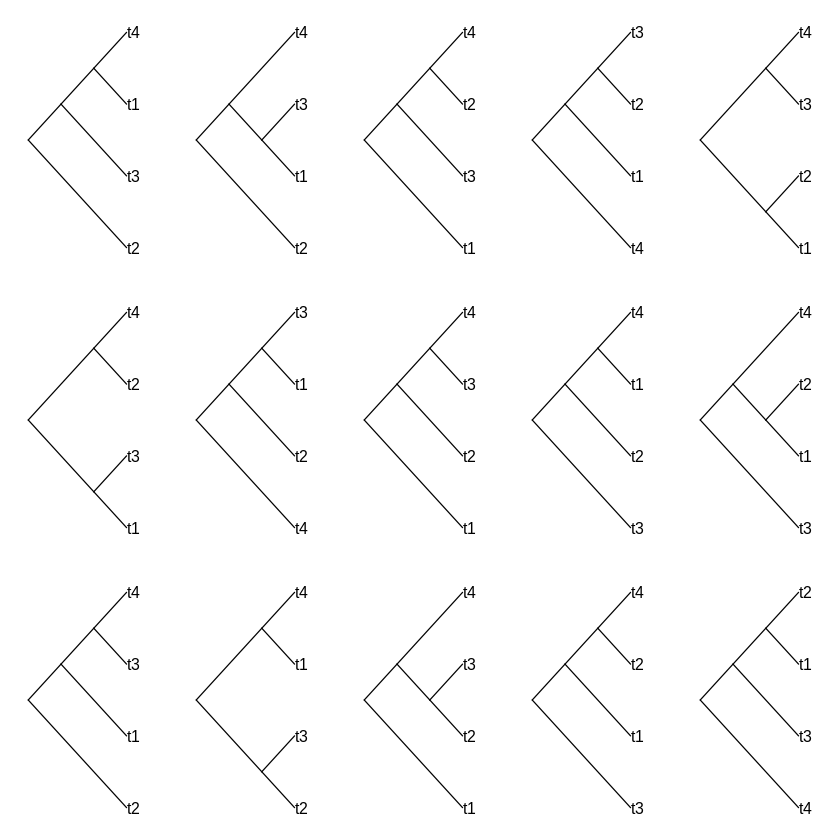

In [5]:
#-enumerate trees
install.packages('phangorn')
library(phangorn)
#- Enumerate all rooted trees & plot (from phangorn vignette)
all_trees <- allTrees(4, rooted = TRUE)
#- plot
layout(matrix(1:15, 3, 5))
par(mar = rep(1.5, 4), xpd = TRUE)
for (i in 1:15) plot(all_trees[[i]], "c", cex = 1.2, font = 1)


In [6]:
#- for more examples than 4 species
nt <- sapply(1:15, howmanytrees, labeled = TRUE, rooted = TRUE)
sapply(nt, function(x) cat(paste0(format(x,digits=16),'\n')))

for(i in 2:15){
  cat(paste0(i,"\t| ",format(nt[i],digits=16, big.mark=","),'\n'))
  
}

1
1
3
15
105
945
10395
135135
2027025
34459425
654729075
13749310575
316234143225
7905853580625
213458046676875


[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
NULL

[[12]]
NULL

[[13]]
NULL

[[14]]
NULL

[[15]]
NULL

2	| 1
3	| 3
4	| 15
5	| 105
6	| 945
7	| 10,395
8	| 135,135
9	| 2,027,025
10	| 34,459,425
11	| 654,729,075
12	| 13,749,310,575
13	| 316,234,143,225
14	| 7,905,853,580,625
15	| 213,458,046,676,875


In [7]:
all_trees

15 phylogenetic trees

In [10]:
library(rphast)
#- For each topology, fit a model to the tree
mods <- lapply( seq_len( all_trees |> length()),
                function(i){
                  #- write tree into newick format
                  mtree <- ape::write.tree(all_trees[[i]])
                  #- fit REV model with maximum likelihood
                  phyloFit(msa,tree = mtree)
                })


In [11]:
mods

[[1]]
ALPHABET: A C G T 
ORDER: 0
SUBST_MOD: REV
TRAINING_LNL: -179348.400258
BACKGROUND: 0.210840 0.324090 0.235565 0.229505 
RATE_MAT:
  -1.110648    0.279786    0.599456    0.231405 
   0.182018   -0.865451    0.188555    0.494879 
   0.536537    0.259413   -0.984166    0.188216 
   0.212586    0.698831    0.193186   -1.104603 
TREE: (t2:0.0189392,(t3:0.413714,(t1:0.034165,t4:0.415992):3.91821e-17):0.0189392);

[[2]]
ALPHABET: A C G T 
ORDER: 0
SUBST_MOD: REV
TRAINING_LNL: -179348.400251
BACKGROUND: 0.210840 0.324090 0.235565 0.229505 
RATE_MAT:
  -1.110650    0.279794    0.599451    0.231405 
   0.182023   -0.865449    0.188548    0.494879 
   0.536532    0.259403   -0.984160    0.188224 
   0.212585    0.698831    0.193194   -1.104610 
TREE: ((t1:0.0341651,t3:0.413713):1.9555e-17,(t2:0.0378785,t4:0.415995):1.9555e-17);

[[3]]
ALPHABET: A C G T 
ORDER: 0
SUBST_MOD: REV
TRAINING_LNL: -158329.075881
BACKGROUND: 0.210840 0.324090 0.235565 0.229505 
RATE_MAT:
  -1.108941    0.279675   

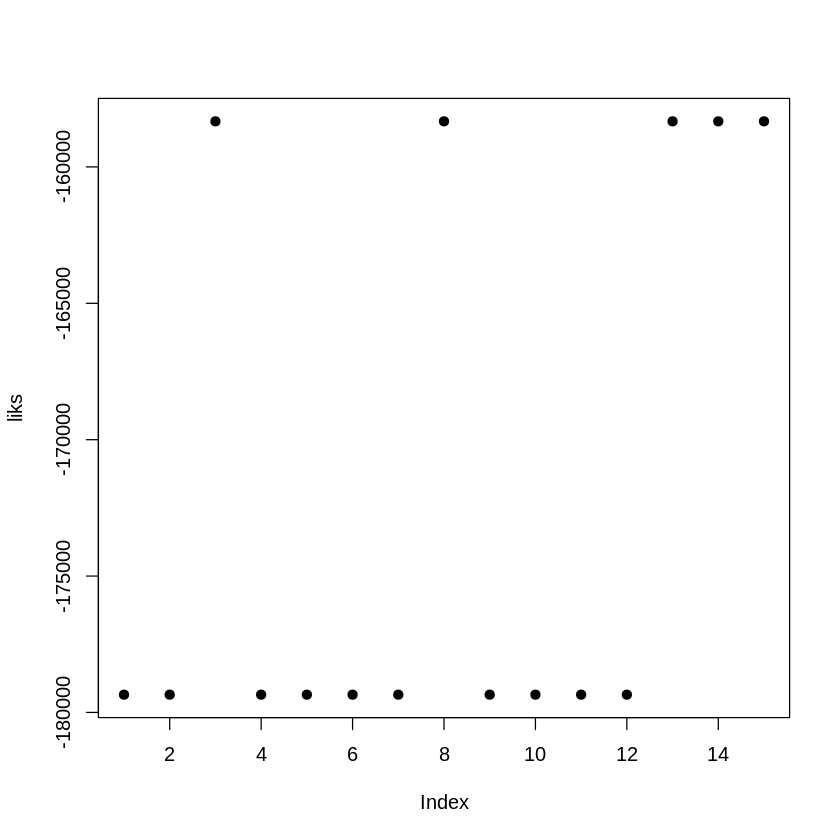

In [13]:

#- plot likelihoods
liks <- lapply(mods, function(x) x$likelihood) |> unlist()
plot(liks,pch=19)

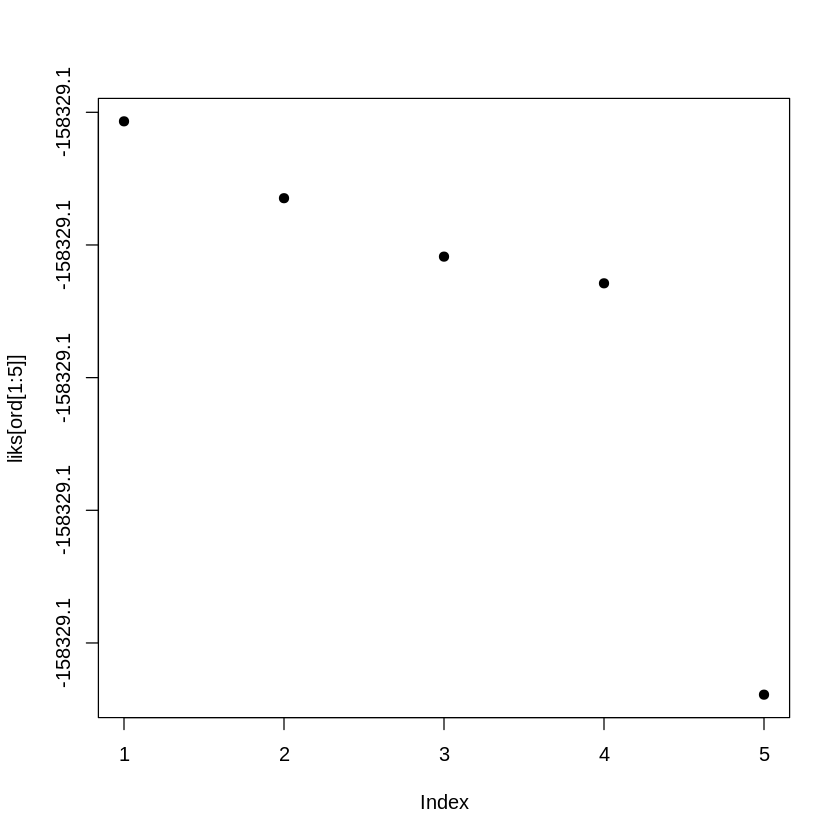

In [14]:
#- zoom in
ord = order(liks,decreasing = TRUE)
plot(liks[ord[1:5]], pch=19)


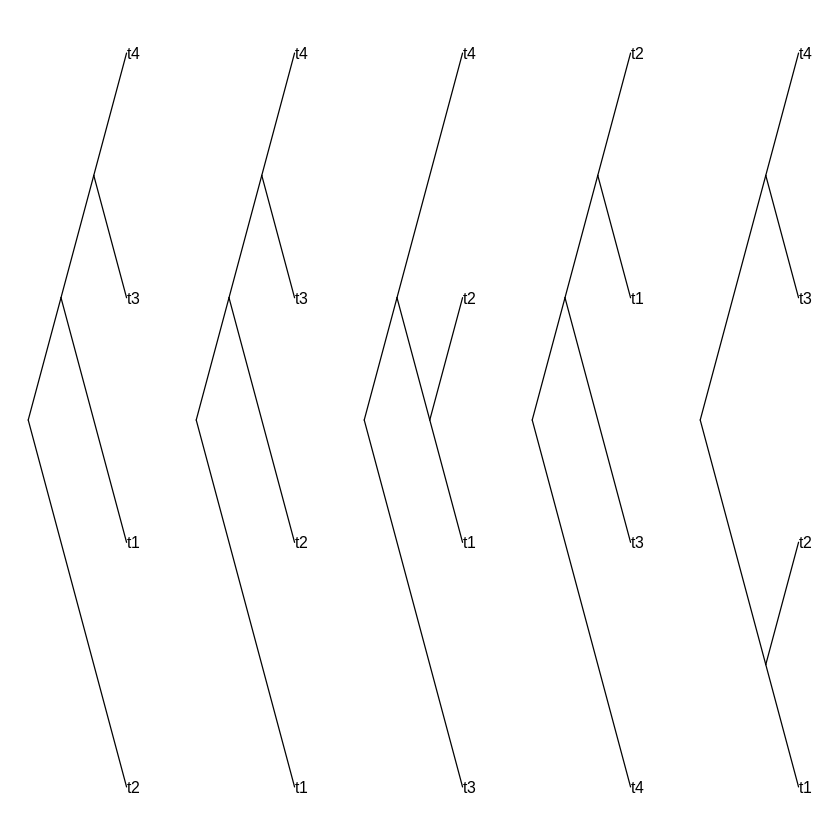

In [15]:

#- Find the topologies
layout(matrix(1:5, 1, 5))
par(mar = rep(1.5, 4), xpd = TRUE)
for (i in 1:5) plot(all_trees[[ord[i]]], "c", cex = 1.2, font = 1)
